## 4.1 Importing packages
If you are working with a notebook, it is good practice to import all the packages that you need at the top of the notebook. This will directly show you which packages you need to have installed, and you will avoid random package imports throughout the notebook.

1. Import the three packages you have used so far with their correct renaming conventions.

In [1]:
# task 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 4.2 Loading a file into a data frame
In practice you should always try to use a function 
If your data has a fixed format, you can load a file directly into a data frame. There are many functions available such as `pd.read_csv()`, `pd.read_excel()`, `pd.read_hdf()` etc... For a list of all supported formats please see the [user guide on IO tools](https://pandas.pydata.org/docs/user_guide/io.html).

Since the passwords are all in separate lines in the file, the most suitable function is `pd.read_table(name)` which just reads data from a generic table in a file called `name`. Since there is no header specified in the file, you have to call the function with the keyword argument `header=None`. If you want to name the column(s) manually, you can pass a list to the keyword argument `names` with the column name(s). Conveniently, the function `pd.read_table()` will automatically remove the newline characters and it will skip empty lines. You therefore do not have to do any preprocessing or filtering (for now).

When you load a lot of data from a file, errors can always happen. If a line has a bad format, an invalid character or any other issue, the line should just be skipped to allow the file to be loaded regardless. You can then check the line manually or use another tool to resolve the error. The corresponding keyword argument to skip bad lines is called `on_bad_lines`, and if you pass the value `"warn"` you will receive a warning for each line that was skipped.

The file `passwords.txt` in todays directory contains ~1 million passwords. If you would rather continue working with a smaller sample size, please use the file `day3/passwords.txt`.

1. Use the function `pd.read_table(name, header=None)` to load your passwords into a data frame. If there is an error when loading the file, also use the argument `on_bad_lines="warn"`. What is the name of the password column in the data frame?
2. Use the keyword argument `names` to change the name of the column when loading the file into a data frame.

<!-- Load the passwords again, and prepare the data frame with all the columns from yesterday. The index should contain the **unique** passwords and you should have the counts, the lengths, the digit sums, the number of alphabetic characters and the number of numeric characters in the data frame. -->

In [2]:
# task 1
# the lines 676579, 748327 and 875766 are skipped, those lines contain tabulator characters "\t" which makes the function pd.read_table() think that there are two values in a line
# the name of the password column is the integer value 0, you can therefore access the column with df[0]
df = pd.read_table("passwords.txt", header=None, on_bad_lines="warn")
df

/tmp/ipykernel_101509/364429445.py:4: ParserWarning: Skipping line 676579: expected 1 fields, saw 2
Skipping line 748327: expected 1 fields, saw 2
Skipping line 875766: expected 1 fields, saw 2

  df = pd.read_table("passwords.txt", header=None, on_bad_lines="warn")


,0
0,lfc
1,LFL870206
2,123abc
3,123abc@
4,teh-cnt
...,...
999843,1974irina
999844,1974sombel
999845,vr19781974
999846,rajib1974


In [3]:
# task 2: pass a list of names (only one name for the single column in this case) to change the column names
df = pd.read_table("passwords.txt", header=None, names=["password"], on_bad_lines="warn")
df

/tmp/ipykernel_101509/2084597823.py:2: ParserWarning: Skipping line 676579: expected 1 fields, saw 2
Skipping line 748327: expected 1 fields, saw 2
Skipping line 875766: expected 1 fields, saw 2

  df = pd.read_table("passwords.txt", header=None, names=["password"], on_bad_lines="warn")


,password
0,lfc
1,LFL870206
2,123abc
3,123abc@
4,teh-cnt
...,...
999843,1974irina
999844,1974sombel
999845,vr19781974
999846,rajib1974


## 4.3 Preparing the data frame again
Since you have loaded the raw passwords into a data frame, you can directly use pandas to get the unique passwords and their counts. Single columns of a data frame are called series (here `s`), and they have a method `s.value_counts()` that will return a new series with the unique values as the index and the corresponding counts as a column called `"count"`. This replaces the function `np.unique(passwords, return_counts=True) that you used in the previous notebook.

1. Get the password column from the data frame and assign it to a variable called `passwords`. Use the function `type()` to make sure that the type of the variable is `pandas.core.series.Series`.
2. Call the method `passwords.value_counts()` to get the unique passwords and their counts and assign the new series to the variable `unique_passwords`. How is this new series sorted?
3. Create a data frame from the new series again by calling the function `pd.DataFrame(unique_passwords)` or by calling the method `unique_passwords.to_frame()`. Assign this data frame to a new variable which you will work with for the rest of the notebook.
4. Calculate the lengths, the digit sums, and the counts of alphabetic, numeric (and special) characters again and assign the results to new columns in the data frame.

In [4]:
# task 1: use square brackets to read a column from the data frame
passwords = df["password"]
type(passwords)

pandas.core.series.Series

In [5]:
# task 2: the passwords are directly sorted by their counts
unique_passwords = passwords.value_counts()
unique_passwords

password
123456           18635
111111            6992
123456789         6578
123123            2731
000000            2288
                 ...  
962464yjs            1
gad1141504gad        1
dg.86634317          1
jinminte             1
qq1141501320         1
Name: count, Length: 739089, dtype: int64

In [6]:
# task 3: create a data frame from the series again
df = unique_passwords.to_frame()
df

,count
password,
123456,18635
111111,6992
123456789,6578
123123,2731
000000,2288
...,...
962464yjs,1
gad1141504gad,1
dg.86634317,1


In [7]:
# task 4: implement the functions to compute all the password metrics again
def get_alphabetic_characters(password):
    return [character for character in password if character.isalpha()]

def get_numeric_characters(password):
    return [int(character) for character in password if character.isnumeric()]

# use isalnum() which is equal to (isalpha() or isnumeric())
def get_special_characters(password):
    return [character for character in password if not character.isalnum()]

# use the function get_numeric_characters() here to compute the digit sum
def compute_digit_sum(password):
    return sum(get_numeric_characters(password))

In [8]:
# task 4: add the length, the digit sum and the character counts to the data frame
df["length"] = np.array([len(password) for password in df.index])
df["digit_sum"] = np.array([compute_digit_sum(password) for password in df.index])
df["n_alphabetic"] = np.array([len(get_alphabetic_characters(password)) for password in df.index])
df["n_numeric"] = np.array([len(get_numeric_characters(password)) for password in df.index])
df["n_special"] = np.array([len(get_special_characters(password)) for password in df.index])

## 4.4 Creating multiple plots in one figure
So far you have only used the functions `plt.plot()`, `plt.bar()` etc. that automatically create a figure with a single plot (which is also called axis). The Jupyter environment will automatically call the function `plt.show()` for you at the end of the cell to actually display the figure/plot.  

If you want to have multiple plots/axes in one figure, you have to define the shape of the figure beforehand. The corresponding function in matplotlib is `plt.subplots()` where you can specify how many rows and columns of axes you want to have in the figure. As an example, if you want to create three axes in a row, you can use the following code snippet:
```python
fig, axs = plt.subplots(ncols=3)
```
The function will return a figure and an array of axes and they will be automatically displayed if you execute the cell. Instead of calling `plt.plot()`, you can now plot something in a specific axes by calling `axs[i].plot()`. The arguments will be the same, you can pass the x-values, the y-data and some styling just like in `plt.plot()`. See the following code snippet that will create two axes showing different linear functions:
```python
fig, axs = plt.subplots(ncols=2)
axs[0].plot(np.arange(10))
axs[1].plot(-np.arange(40))
```

If you want to plot something directly from a data frame, you have to tell the data frame method which axis you want to use. For example, if you want to plot the digit sum (in the column `"digit_sum"`) as a function of the number of alphabetic characters (in the column `"n_alphabetic"`) in the second axis of the figure, you can use the following code snippet:
```python
fig, axs = plt.subplots(ncols=3)
df.plot("n_alphabetic", "digit_sum", kind="scatter", ax=axs[1])
```

If you want to change the overall size of the figure, you can pass a list with the width and the height to the parameter `figsize` of the function `plt.subplots()`. As an example, see the following code snippet that will return a very wide figure with two axes:
```python
fig, axs = plt.subplots(ncols=2, figsize=[20, 4])
```

To save your figure at the end of the cell, you can use the method `fig.savefig(name)` with the `name` of the figure. See the following code snippet to create a new figure with three empty axes, and to save it to the file `"plot.png"` at the end of the cell:
```python
fig, axs = plt.subplots(ncols=3)
fig.savefig("plot.png")
```

1. Create a new figure with three empty axes in one column. If you do not like the aspect ratio, use the parameter `figsize` to change the size of the figure.
2. Create a new figure with two axes in one row. Show the digit sum as a function of the password length in the first axes, and show the digit sum as a function of the number of numeric characters in the second axes. In both axes, display the maximum possible digit sum. Assign labels to all the data and add a legend.
3. Create a new figure with two axes in one row. Display different columns from the data frame in the two axes. Save the figure and open the file on your own device to check that everything looks as expected.
4. EXTRA: Create a figure with 4 axes in 2 rows. How do you have to index the `axs` to select the individual plots? Fill the axes with some data from the data frame. Call `fig.set_tight_layout(True)` if the axes are overlapping with the labels.

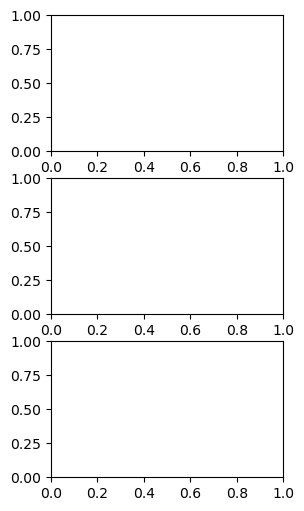

In [9]:
# task 1: by specifying nrows=3, you will receive three equally sized axes that are stacked in a column
fig, axs = plt.subplots(nrows=3, figsize=(3, 6))

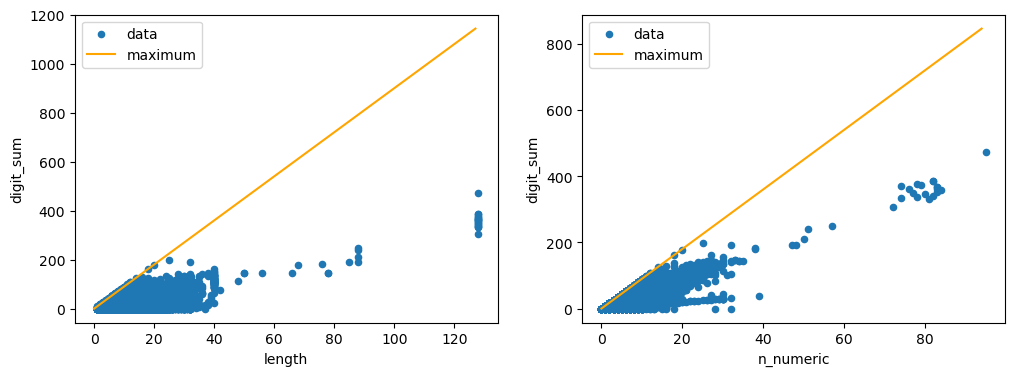

In [10]:
# task 2: use ncols=2 and figsize=[12, 4] to get two reasonably sized plots/axes in a row
fig, axs = plt.subplots(ncols=2, figsize=[12, 4])

# plot the digit sum as a function of the length in the first axes
# compute the maximum digit sum for x in [0, maximum length - 1]
maximum_digit_sum = 9 * np.arange(df["length"].max())
# create a scatter plot with x = "length" and y = "digit_sum" in axs[0]
df.plot("length", "digit_sum", kind="scatter", ax=axs[0], label="data")
# plot the maximum_digit_sum as a linear function
# you need to specify a color since plot() does not care/know that the scattered points already use the color blue
axs[0].plot(maximum_digit_sum, label="maximum", color="orange")
axs[0].legend()

# plot the digit sum as a function of the number of numeric characters in the second axes
# this is identical to the previous axis, just with x = "n_numeric"
maximum_digit_sum = 9 * np.arange(df["n_numeric"].max())
df.plot("n_numeric", "digit_sum", kind="scatter", ax=axs[1], label="data")
axs[1].plot(maximum_digit_sum, label="maximum", color="orange")
axs[1].legend()

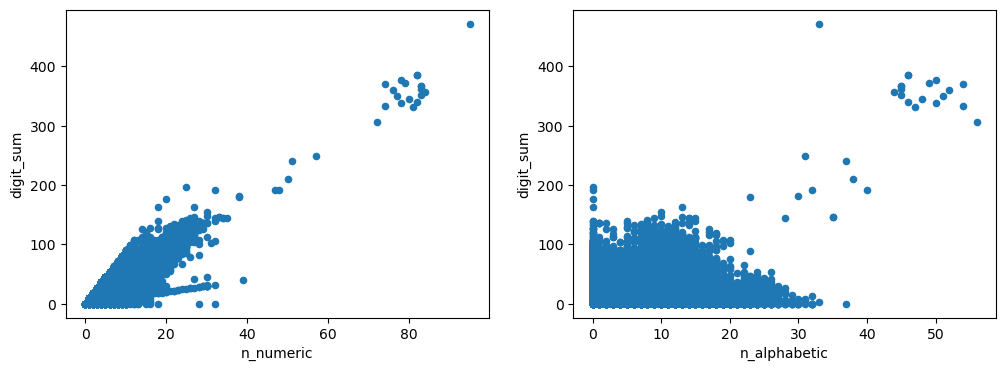

In [11]:
# task 3: display some data from the data frame in the two axes
fig, axs = plt.subplots(ncols=2, figsize=[12, 4])
df.plot("n_numeric", "digit_sum", kind="scatter", ax=axs[0])
df.plot("n_alphabetic", "digit_sum", kind="scatter", ax=axs[1])
fig.savefig("plot.png")

<Axes: xlabel='n_alphabetic', ylabel='length'>

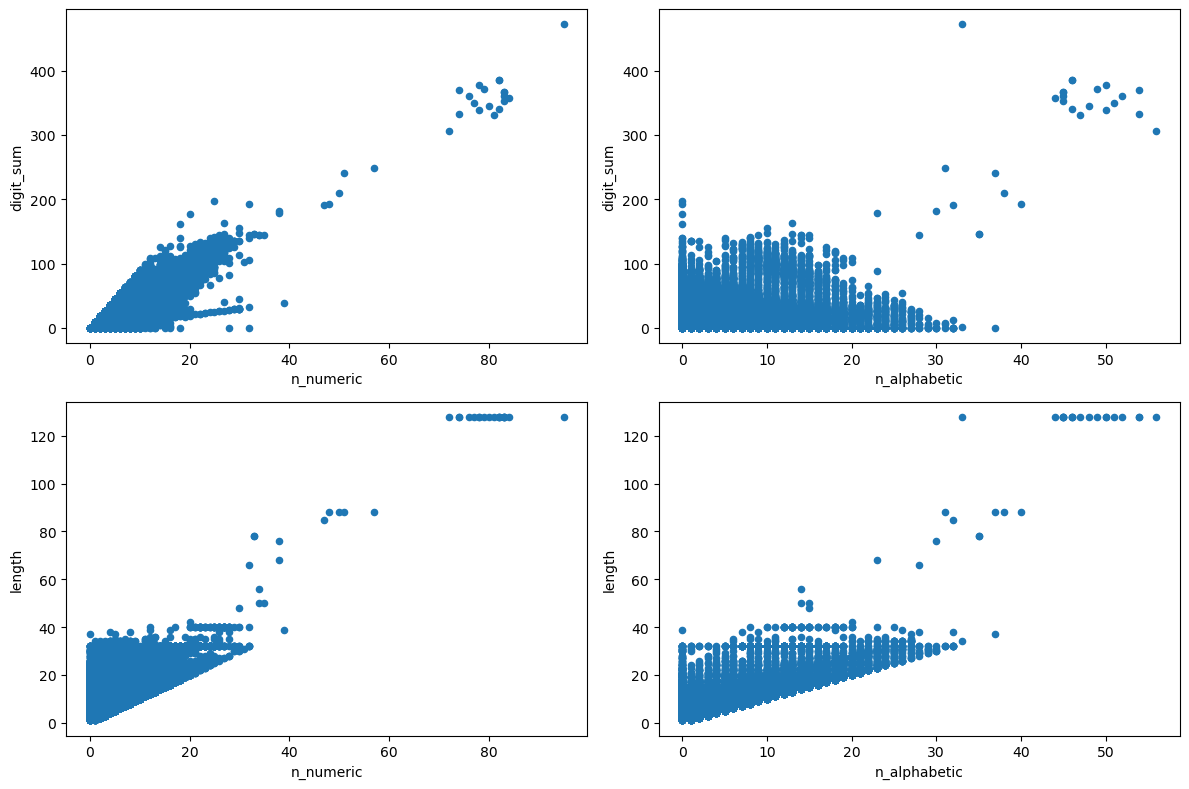

In [12]:
# task 4: you can select the separate axes with a row index and a column index, e.g. axs[0,1] will be the second axes in the first row
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.set_tight_layout(True)
df.plot("n_numeric", "digit_sum", kind="scatter", ax=axs[0,0])
df.plot("n_alphabetic", "digit_sum", kind="scatter", ax=axs[0,1])
df.plot("n_numeric", "length", kind="scatter", ax=axs[1,0])
df.plot("n_alphabetic", "length", kind="scatter", ax=axs[1,1])

## EXTRA: Computing the palindrome depth
A palindrome is a word/string that reads the same backwards as forwards, for example "radar" or "level". Instead of just checking all passwords whether they are a palindrome or not, the exercise is to count the number of matching characters up to the middle when reading the password backwards and forwards. If the number of characters is odd, you also have to include the middle character in the count. See the following examples to clarify how the palindrome depth is defined:
```
radar -> 3
12abcd21 -> 2
levels -> 0
```

1. Write the function that computes the palindrome depth for a single password. Try the examples and two other passwords to check that your function works correctly.
2. Use the function to calculate the palindrome depth for the passwords in your data frame and add the values to the data frame as a new column.
3. Identify the true palindromes (e.g. `"radar"` or `"level"`, but not `"abca"`) using the palindrome depths and the lengths of the passwords. The result should be a boolean array that you can add to the data frame as a new column.
4. Visualize your results and see if you can find anything interesting.

In [13]:
# task 1: see the docstring of the function for the explanation of the computation
def palindrome_depth(password):
    """
    Since the password is checked forwards and backwards, you only have to
    iterate over half of the password length. The integer division // 2 is
    required to get an integer result. With a regular division the result
    would be a float that cannot be used in the function range().

    The for-loop is interrupted by the return statement as soon as it finds a
    character pair that is not equal. The current value of i will then be the
    palindrome depth. See the examples below to further illustrate this.

    If the length of the password is odd, the middle character does not have
    to be checked since this will contribute to the palindrome count in any
    case. This is only relevant if the for-loop is completed. In that case the
    palindrome depth should include the middle character in the count. E.g.
    the password "radar" is supposed to have the palindrome depth 3. You can
    achieve this by adding 1 to the password length before doing the integer
    division by 2. See a few examples (not in Python syntax!):
        length = 4 -> (4 + 1) // 2 = 2
        length = 5 -> (5 + 1) // 2 = 3
        length = 6 -> (6 + 1) // 2 = 3

    Example
    -------
    password = "radar"
    i = 0 -> "r" == "r"
    i = 1 -> "a" == "a"
    for loop is over -> return 3

    password = "12abcd21"
    i = 0 -> "1" == "1"
    i = 1 -> "2" == "2"
    i = 2 -> "a" != "d"
    return the current value of the index as the depth
    """
    for i in range(len(password) // 2):
        if password[i] != password[-1-i]:
            return i
    return (len(password) + 1) // 2

In [14]:
# task 1: create a list of passwords to test and print them with their palindrome depths
test_passwords = ["radar", "12abcd21", "levels", "otto", "_!#?#.#!_"]
for password in test_passwords:
    print(f"{password}: {palindrome_depth(password)}")

radar: 3
12abcd21: 2
levels: 0
otto: 2
_!#?#.#!_: 3


In [15]:
# task 2: continue with a copy of the basic data frame for this exercise, this is not required but the data frame would otherwise get quite wide over three EXTRA exercises
df_palindrome = df.copy()

In [16]:
# task 2: add the column "palindrome_depth" to the data frame
df_palindrome["palindrome_depth"] = np.array([palindrome_depth(password) for password in df.index])

In [17]:
# task 3: add the boolean column "palindrome" by comparing the password "length" to the "palindrome_depth"
# the value (length + 1) // 2 is equal to the return value of the function palindrome_depth() for true palindromes
df_palindrome["palindrome"] = (df_palindrome["length"] + 1) // 2 == df_palindrome["palindrome_depth"]

In [18]:
# task 3: there are a little over 2000 true palindromes in the dataset
df_palindrome.query("palindrome")

,count,length,digit_sum,n_alphabetic,n_numeric,n_special,palindrome_depth,palindrome
password,,,,,,,,
111111,6992,6,6,0,6,0,3,True
000000,2288,6,0,0,6,0,3,True
11111,1408,5,5,0,5,0,3,True
222222,1380,6,12,0,6,0,3,True
666,1075,3,18,0,3,0,2,True
...,...,...,...,...,...,...,...,...
11411411,1,8,14,0,8,0,4,True
kekek,1,5,0,5,0,0,3,True
917719,1,6,34,0,6,0,3,True


In [19]:
# task 4: only look at the passwords with a finite "palindrome_depth"
# save the partial data frame in a new variable since this will be used for all plots
df_plot = df_palindrome.query("palindrome_depth > 0")

In [20]:
# task 4: group the data by specific columns
group_length = df_plot.groupby("length")
group_alphabetic = df_plot.groupby("n_alphabetic")
group_numeric = df_plot.groupby("n_numeric")

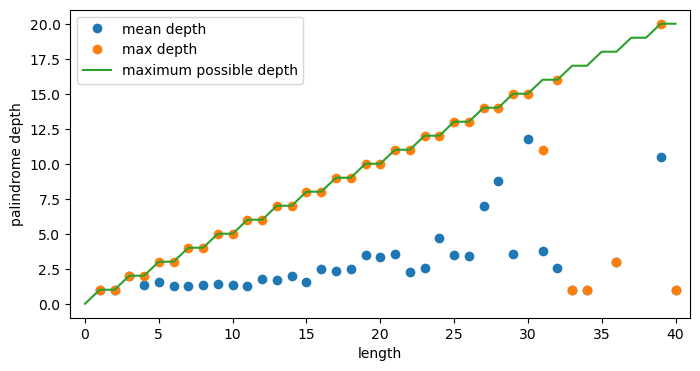

In [21]:
# task 4: there is a true palindrome in the data frame for every length up to 30
# the mean palindrome depth is quite constant as a function of the length, most passwords will only have a depth of 1 or 2 characters
# the increase of the palindrome_depth with the length is mostly due to passwords consisting of only a single unique character
fig, axs = plt.subplots(ncols=1, figsize=(8, 4))
maximum_palindrome_depth = (np.arange(41) + 1) // 2
group_length.mean().plot(y="palindrome_depth", marker="o", ls="none", label="mean depth", ax=axs)
group_length.max().plot(y="palindrome_depth", marker="o", ls="none", label="max depth", ax=axs)
axs.plot(maximum_palindrome_depth, label="maximum possible depth")
axs.set_ylabel("palindrome depth")
axs.set_xlim(-1, 41)
axs.legend()

## EXTRA: Computing the password strength
The [password strength](https://en.wikipedia.org/wiki/Password_strength) estimates how many trials you need on average to crack a password using a brute-force approach. The equation for the information entropy is
$$
H = L \frac{\log{N}}{\log{2}}
$$
where $L$ is the length of the password and $N$ is the number of possible symbols that depends on the set of symbols. If a passwords consists only of numeric characters, there will only be 10 possible symbols. On the other hand, if a password contains numeric characters and alphabetic characters the number of possible symbols will be higher. See the table on [Entropy per symbol](https://en.wikipedia.org/wiki/Password_strength#Random_passwords) for the relevant symbol sets.

1. Write the function that computes the password strength of a single password based on the symbol set and the password length. You should differentiate between at least the following three symbol sets:
   - Arabic numerals (0–9)
   - Case insensitive Latin alphabet (a–z or A–Z)
   - All ASCII printable characters (a-z, A-Z, 0-9 and special characters)
   - Use more symbol sets if you want to
2. Compute the password strength for each password in the data frame and add the result as a new column.
3. Visualize your results and see if you can find anything interesting.

In [22]:
# task 1
def password_strength(password):
    # use the functions from exercise 4.3
    numeric = get_numeric_characters(password)
    alphabetic = get_alphabetic_characters(password)
    special = get_special_characters(password)
    # use the boolean value of the lists to check if they are empty

    symbol_count = 0
    # there are 10 numeric characters
    if numeric:
        symbol_count += 10
    # there are 2*26 alphabetic characters (if you don't handle lower-case and upper-case characters separately)
    if alphabetic:
        symbol_count += 52
    # there should be 95 - 62 = 33 special characters
    if special:
        symbol_count += 33
    return len(password) * np.log2(symbol_count)

In [23]:
# task 2: continue with a copy of the basic data frame for this exercise, this is not required but the data frame would otherwise get quite wide over three EXTRA exercises
df_strength = df.copy()

In [24]:
# task 2: add the password strength as a column to the data frame
df_strength["password_strength"] = np.array([password_strength(password) for password in df.index])

# add the relative password strength per character to the data frame
# I only realized that this is more interesting than the absolute password strength while trying to create some interesting plots
# it would have been better to only calculate the relative password strength with the function password_strength() in the first place
df_strength["relative_password_strength"] = df_strength["password_strength"] / df_strength["length"]

In [25]:
# task 3: remove the extreme lengths and only look at duplicate passwords
df_plot = df_strength.query("length < 50 and count > 1")

Text(0.5, 0.98, 'Password strength per character')

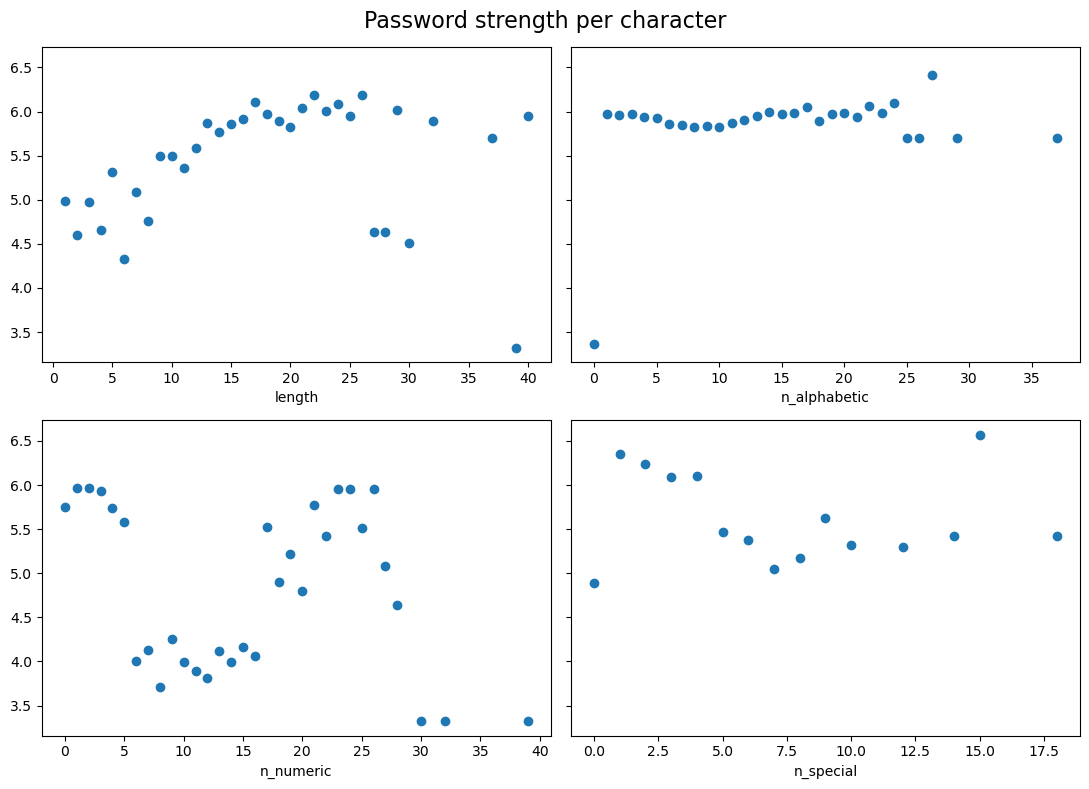

In [26]:
# task 3: display the password strength as a function of the length and the character counts

# use sharey=True to share the scale and labels of the y axis in each row
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(11, 8), sharey=True)
# reduce the spacing between the plots/axes
fig.set_tight_layout(True)

# group the data by the x-values and compute the mean across those groups
df_plot.groupby("length").mean().plot(y="relative_password_strength", marker="o", linestyle="none", ax=axs[0,0], legend=False)
df_plot.groupby("n_alphabetic").mean().plot(y="relative_password_strength", marker="o", linestyle="none", ax=axs[0,1], legend=False)
df_plot.groupby("n_numeric").mean().plot(y="relative_password_strength", marker="o", linestyle="none", ax=axs[1,0], legend=False)
df_plot.groupby("n_special").mean().plot(y="relative_password_strength", marker="o", linestyle="none", ax=axs[1,1], legend=False)
fig.suptitle("Password strength per character", fontsize=16)

# up to ~20 characters the password strength per character still increases with the length because most passwords will contain all character types
# the password strength is practically constant as a function of n_alphabetic, only for n_alphabetic = 0 the value is significantly lower
# the password strength drops significantly for n_numeric between 6 and 16, most likely because these passwords will consist only of numeric characters
# the password strength is maximal for n_special from 1 to 4 (the data point at n_special = 15 is only the average of two passwords)

## EXTRA: Computing numeric character frequencies
To analyze which digits are used the most frequently in the password you have to count the individual numeric characters for each password. If a numeric character does not occur in a password, the count should be zero. See the following example as an illustration:
```python
password = "1234123459"
get_numeric_character_counts(password) -> {"0": 0, "1": 2, "2": 2, "3": 2, "4": 2, "5": 1, "6": 0, "7": 0, "8": 0, "9": 1}
```

1. Write the function that counts the individual numeric characters in a single password.
2. Get the counts from each password in the data frame and assign the data to the data frame. You need ten additional columns in the data frame, one for each numeric character.
3. Visualize your results and see if you can find anything interesting.

In [27]:
# task 1: if you create a list of numeric characters and pass this to a pandas Series, you can just use the method .value_counts() to get the unique values and their counts
# I did not test how this compares to creating a dictionary with the characters and their counts (like you did on day1 and day2) in terms of runtime and memory load
def get_numeric_character_counts(password):
    series = pd.Series([char for char in password if char.isnumeric()]).value_counts()
    # replace the name "count" by the value of password since this will be the index when all the series are combined into a single data frame
    series.name = password 
    return series

In [28]:
# task 2: get a series with the numeric characters of each password and append them all to a list
# then create a data frame from the list of series
# WARNING: this might take a while to run!
df_numeric_characters = pd.DataFrame([get_numeric_character_counts(password) for password in df.index])

In [29]:
# task 2: if a numeric character was missing from the password the series returned from get_numeric_character_counts() will just not have this index
# in the data frame the empty columns for each password are filled with NaN (not a number)
# since we want these values to be zero we can use the method .fillna(0) to replace all NaN values with 0
# use the method .convert_dtypes() to convert everything to integer values again, the dtype was float earlier due to the NaN values
df_numeric_characters = df_numeric_characters.fillna(0).convert_dtypes()

In [30]:
# create a new data frame by joining the base data frame and the data frame with the numeric character counts
# since the two data frames have the same index and no duplicate columns, joining/combining works without any issues
df_numeric = df.join(df_numeric_characters)
df_numeric

,count,length,digit_sum,n_alphabetic,n_numeric,n_special,1,2,3,4,5,6,7,8,9,0
password,,,,,,,,,,,,,,,,
123456,18635,6,21,0,6,0,1,1,1,1,1,1,0,0,0,0
111111,6992,6,6,0,6,0,6,0,0,0,0,0,0,0,0,0
123456789,6578,9,45,0,9,0,1,1,1,1,1,1,1,1,1,0
123123,2731,6,12,0,6,0,2,2,2,0,0,0,0,0,0,0
000000,2288,6,0,0,6,0,0,0,0,0,0,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962464yjs,1,9,31,3,6,0,0,1,0,2,0,2,0,0,1,0
gad1141504gad,1,13,16,6,7,0,3,0,0,2,1,0,0,0,0,1
dg.86634317,1,11,38,2,8,1,1,0,2,1,0,2,1,1,0,0


In [31]:
# task 3: create a list with the labels of the numeric character columns for the plotting later
numeric_columns = [str(n) for n in range(10)]
numeric_columns

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Text(0.5, 1.05, 'Mean numeric character count of 739089 passwords')

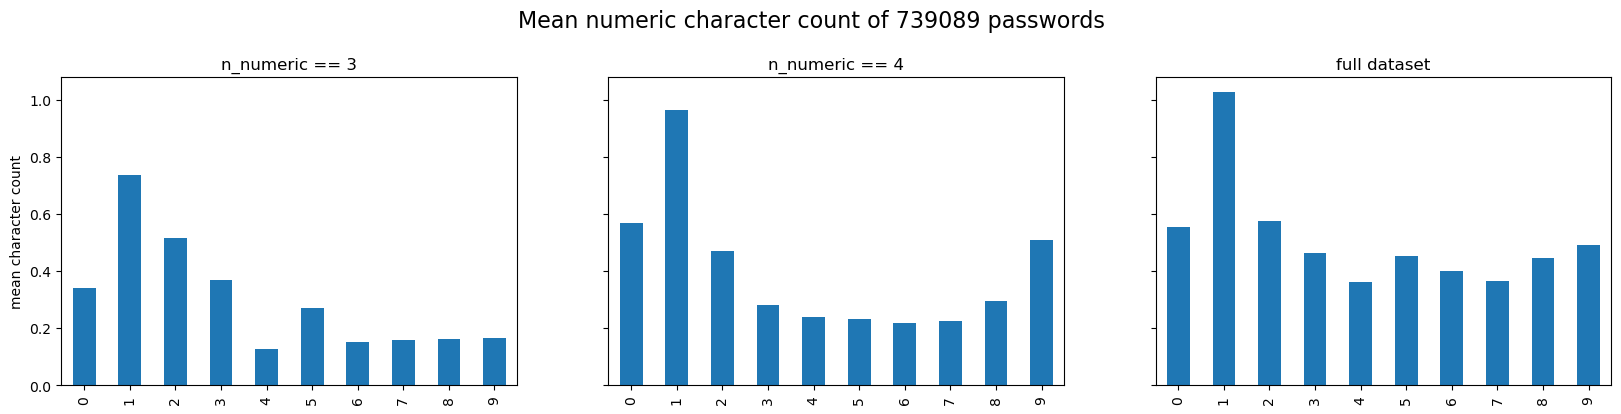

In [32]:
# task 3
# the numeric character "1" is by far the most frequent one, this was to be expected
# if you only look at passwords with four numeric characters, the character "9" is quite common compared to "3"-"8". This could be due to years (e.g. year of birth) from the last century often being used in passwords.
fig, axs = plt.subplots(ncols=3, figsize=(20, 4), sharey=True)
query0 = "n_numeric == 3"
query1 = "n_numeric == 4"
df_numeric.query(query0).mean()[numeric_columns].plot(kind="bar", ax=axs[0])
df_numeric.query(query1).mean()[numeric_columns].plot(kind="bar", ax=axs[1])
df_numeric.mean()[numeric_columns].plot(kind="bar", ax=axs[2])

axs[0].set_title(query0)
axs[1].set_title(query1)
axs[2].set_title("full dataset")
axs[0].set_ylabel("mean character count")
fig.suptitle(f"Mean numeric character count of {len(df_numeric)} passwords", fontsize=16, y=1.05)